# Import Libraries

In [554]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [555]:
data = pd.read_csv('loan_customer.csv')
data.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


In [556]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
phone_number,569.0,5.468552e+11,1.987860e+11,6.281101e+10,6.281140e+11,6.281343e+11,6.285665e+11,6.287799e+11
applicant_income,612.0,5.681549e+03,9.056454e+03,1.500000e+02,2.874500e+03,3.812500e+03,5.815750e+03,1.705780e+05
coapplicant_income,621.0,1.616874e+03,2.915075e+03,0.000000e+00,0.000000e+00,1.167000e+03,2.302000e+03,4.166700e+04
loan_amount,621.0,1.451337e+05,8.401112e+04,9.000000e+03,1.000000e+05,1.250000e+05,1.650000e+05,7.000000e+05
loan_term_month,621.0,3.426087e+02,6.409084e+01,1.200000e+01,3.600000e+02,3.600000e+02,3.600000e+02,4.800000e+02
loan_term_year,621.0,2.855072e+01,5.340903e+00,1.000000e+00,3.000000e+01,3.000000e+01,3.000000e+01,4.000000e+01
credit_history,570.0,8.421053e-01,3.649626e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [557]:
data.columns

Index(['loan_id', 'birth_date', 'phone_number', 'gender', 'married',
       'dependents', 'education', 'self_employed', 'applicant_income',
       'coapplicant_income', 'loan_amount', 'loan_term_month',
       'loan_term_year', 'credit_history', 'has_credit_card', 'property_type',
       'loan_status'],
      dtype='object')

# Data Cleansing

## Handling missing values

In [558]:
print('Checking Missing Value: ')
data.isna().sum()

Checking Missing Value: 


loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

In [559]:
data.drop('has_credit_card', axis = 1 , inplace = True)
# This column is dropped because having a lot of nan data, it makes bias in data

In [560]:
data.shape

(621, 16)

In [561]:
print('After dropping missing value: ')
data.dropna(inplace= True)
data.isna().sum()

After dropping missing value: 


loan_id               0
birth_date            0
phone_number          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
property_type         0
loan_status           0
dtype: int64

In [562]:
data.shape

(434, 16)

## Handling duplicated data

In [563]:
print('Checking duplicate data')
data.duplicated().sum()

Checking duplicate data


5

In [564]:
data = data.drop_duplicates()
data.duplicated().sum()

0

## Handling Outlier

<AxesSubplot:xlabel='loan_amount'>

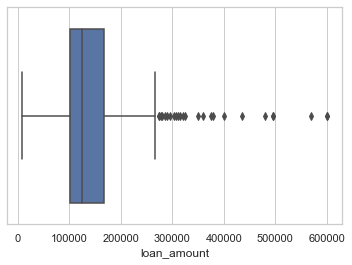

In [565]:
sns.boxplot(x='loan_amount', data=data)

<AxesSubplot:xlabel='loan_term_month'>

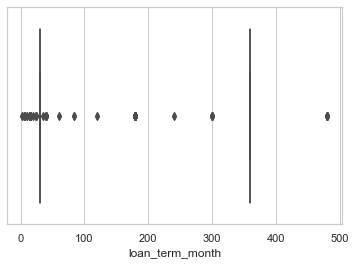

In [566]:
sns.boxplot(x='loan_term_year', data=data)
sns.boxplot(x='loan_term_month', data=data)
# We do not filter this

In [567]:
print("number of rows before filtering outlier") 
print(len(data))

for col in ["applicant_income", "coapplicant_income", "loan_amount"]:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3-Q1
  low_limit = Q1 - 1.5*IQR
  high_limit = Q3 + 1.5*IQR
  data = data[(data[col] >= low_limit) & (data[col] <= high_limit)]

print("number of rows after filtering outlier")
print(len(data))

number of rows before filtering outlier
429
number of rows after filtering outlier
366


## Feature Encoding

In [568]:
# Feature Encoding on column gender, married, education, loan status
mapping_gender = {
    "Male" : 0,
    "Female" : 1
}

mapping_married = {
    "No" : 0,
    "Yes" : 1
}

mapping_education = {
    "Not Graduate" : 0,
    "Graduate" : 1
}


mapping_loan_status = {
    "REJECT" : 0,
    "APPROVE" : 1
}

data['gender'] = data ['gender']. map(mapping_gender)
data['married'] = data['married'].map(mapping_married)
data['education'] = data['education'].map(mapping_education)
data['loan_status'] = data['loan_status'].map(mapping_loan_status)

# One Hot encoding for property_type column
encoding_property_type = pd.get_dummies(data["property_type"], prefix="property")
data = data.join(encoding_property_type)


data.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status,property_apartment,property_house,property_studio
0,LP001002,1977-05-15,6.281142e+11,0,0,0,1,No,5849.0,0.0,100000,360,30,1.0,house,1,0,1,0
1,LP001003,1979-08-24,6.287764e+11,0,1,1,1,No,4583.0,1508.0,128000,360,30,1.0,studio,0,0,0,1
2,LP001005,1991-03-28,6.281192e+11,0,1,0,1,Yes,3000.0,0.0,66000,360,30,1.0,house,1,0,1,0
3,LP001006,1980-06-02,6.285634e+10,0,1,0,0,No,2583.0,2358.0,120000,360,30,1.0,house,1,0,1,0
4,LP001008,1989-05-19,6.281130e+11,0,0,0,1,No,6000.0,0.0,141000,360,30,1.0,house,1,0,1,0


# Business Insight

## Analysis of customer interest based on property type

In [569]:
datagender = data.groupby(['gender', 'property_type'])['loan_id'].count().reset_index()
datagender.columns = ['gender', 'property_type', 'count']
datagender.sort_values(['property_type'])

,gender,property_type,count
0,0,apartment,114
3,1,apartment,34
1,0,house,98
4,1,house,16
2,0,studio,87
5,1,studio,17


In [570]:
data.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status,property_apartment,property_house,property_studio
0,LP001002,1977-05-15,6.281142e+11,0,0,0,1,No,5849.0,0.0,100000,360,30,1.0,house,1,0,1,0
1,LP001003,1979-08-24,6.287764e+11,0,1,1,1,No,4583.0,1508.0,128000,360,30,1.0,studio,0,0,0,1
2,LP001005,1991-03-28,6.281192e+11,0,1,0,1,Yes,3000.0,0.0,66000,360,30,1.0,house,1,0,1,0
3,LP001006,1980-06-02,6.285634e+10,0,1,0,0,No,2583.0,2358.0,120000,360,30,1.0,house,1,0,1,0
4,LP001008,1989-05-19,6.281130e+11,0,0,0,1,No,6000.0,0.0,141000,360,30,1.0,house,1,0,1,0


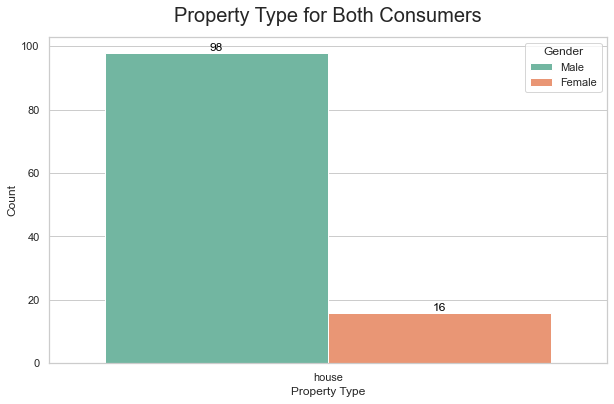

In [571]:
# Data Visualization

data_studio=data[data["property_type"]=="house"]
f, ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data = data_studio, x = 'property_type', hue = 'gender', palette = "Set2")

for bar in ax.patches:
    bar_value = bar.get_height()
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=12)

# Legend
plt.legend(['Male', 'Female'], title = 'Gender')
    
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Property Type for Both Consumers', pad=15, size=20)
plt.savefig('Analyze_the_behavior_of_loan_property_customers_01.png', dpi=200)

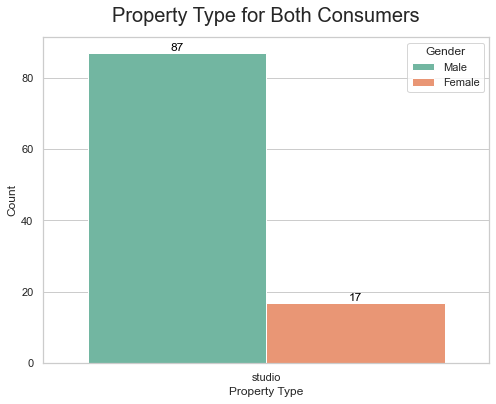

In [572]:
# Data Visualization

data_studio=data[data["property_type"]=="studio"]
f, ax = plt.subplots(1,1,figsize=(8,6))
sns.countplot(data = data_studio, x = 'property_type', hue = 'gender', palette = "Set2")

for bar in ax.patches:
    bar_value = bar.get_height()
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=12)

# Legend
plt.legend(['Male', 'Female'], title = 'Gender')
    
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Property Type for Both Consumers', pad=15, size=20)
plt.savefig('Analyze_the_behavior_of_loan_property_customers_01.png', dpi=200)

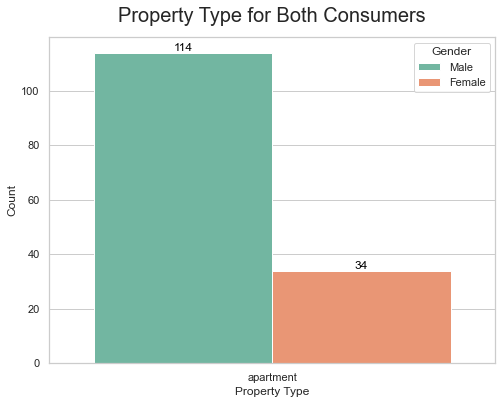

In [573]:
# Data Visualization

data_studio=data[data["property_type"]=="apartment"]
f, ax = plt.subplots(1,1,figsize=(8,6))
sns.countplot(data = data_studio, x = 'property_type', hue = 'gender', palette = "Set2")

for bar in ax.patches:
    bar_value = bar.get_height()
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=12)

# Legend
plt.legend(['Male', 'Female'], title = 'Gender')
    
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Property Type for Both Consumers', pad=15, size=20)
plt.savefig('Analyze_the_behavior_of_loan_property_customers_01.png', dpi=200)

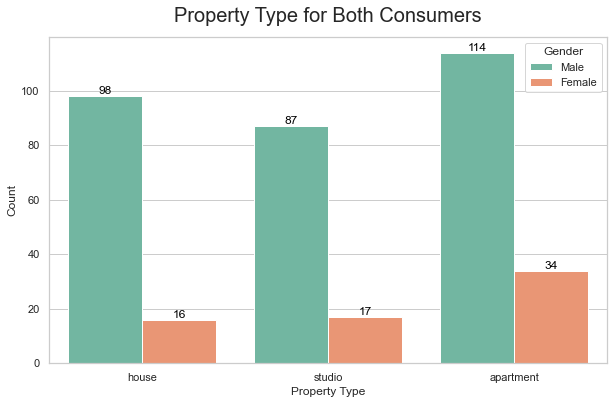

In [579]:
f, ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data = data, x = 'property_type', hue = 'gender', palette = "Set2")

for bar in ax.patches:
    bar_value = bar.get_height()
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=12)

# Legend
plt.legend(['Male', 'Female'], title = 'Gender')
    
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Property Type for Both Consumers', pad=15, size=20)
plt.savefig('Analyze_the_behavior_of_loan_property_customers_01.png', dpi=200)

##  Analysis of the effect of marital status on the loan period

In [574]:
data_married = data.groupby(['married', 'loan_term_year'])['loan_id'].count().reset_index()
data_married.columns = ['married', 'loan_term_year', 'count']
data_married.sort_values(['loan_term_year'])

,married,loan_term_year,count
0,0,3,2
1,0,5,1
7,1,5,1
8,1,7,3
2,0,10,1
9,1,10,1
3,0,15,4
10,1,15,22
11,1,20,2
4,0,25,3


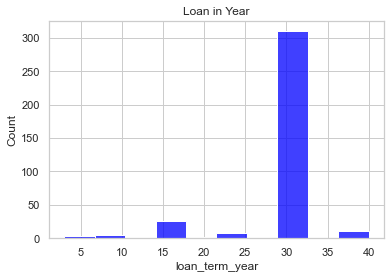

In [575]:
sns.histplot(data=data, x="loan_term_year",color="blue")
plt.title('Loan in Year')
plt.show()

In [576]:
loan_term_year_interval = {}
for i in range(1,41):
    if i<15:
        loan_term_year_interval[i]= '<15'
    elif i>=15 and i<=25:
        loan_term_year_interval[i]= '15-25'
    elif i==30:
        loan_term_year_interval[i]= '30'
    elif i>30:
        loan_term_year_interval[i]= '>30'
    else:
        pass
    
data_married['loan_term_year_interval'] = data_married['loan_term_year'].replace(loan_term_year_interval)

In [577]:
data_married.head()

,married,loan_term_year,count,loan_term_year_interval
0,0,3,2,<15
1,0,5,1,<15
2,0,10,1,<15
3,0,15,4,15-25
4,0,25,3,15-25


Text(-0.5, 205, 'Most applicants have chosen a loan term of 30 years')

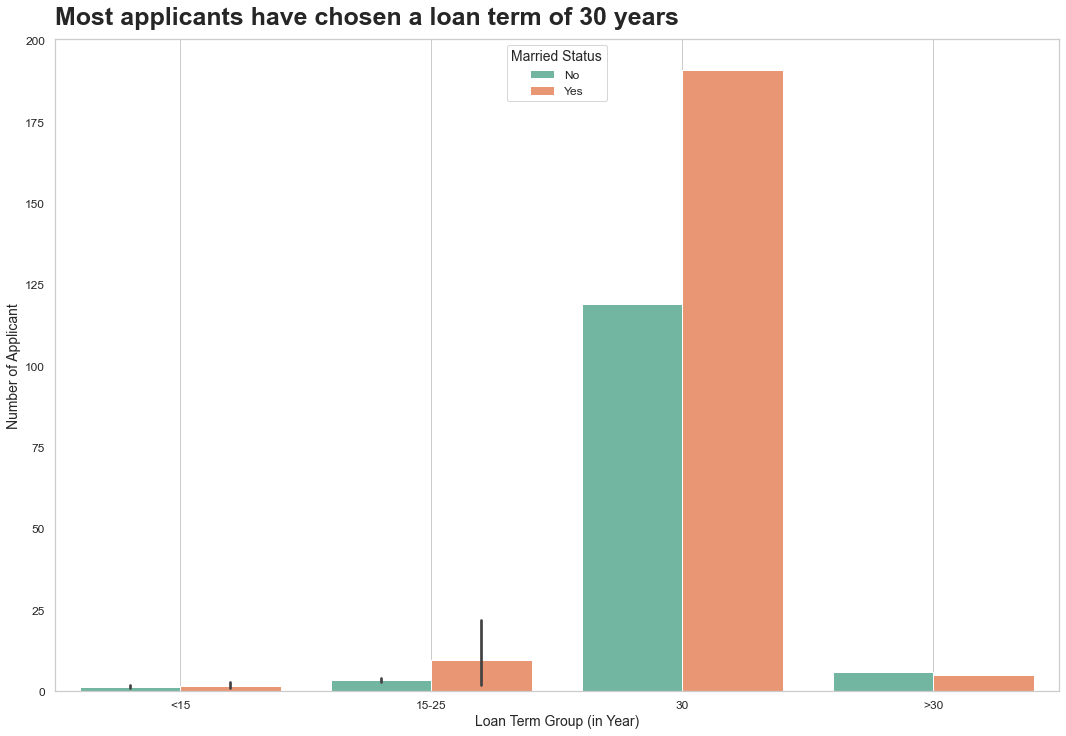

In [578]:
data_married['married'] = data_married['married'].map({0: 'No', 1: 'Yes'})

plt.figure(figsize=(18,12))
sns.barplot(x='loan_term_year_interval', y='count', hue='married', data=data_married, palette='Set2')

plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid()
plt.legend(title='Married Status', title_fontsize=14, prop={'size':12}, loc=9)

plt.xlabel('Loan Term Group (in Year)', fontsize=14)
plt.ylabel('Number of Applicant', fontsize=14)
plt.text(x=-0.5, y=205, s="Most applicants have chosen a loan term of 30 years", fontsize=25, fontweight='bold')